In [1]:
# importing
import plotly
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import chart_studio

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import chart_studio.plotly as py
from chart_studio.plotly import plot, iplot
import cufflinks as cf
import seaborn as sns
import plotly.express as px

import plotly.graph_objs as go
from pmdarima import auto_arima

chart_studio.tools.set_credentials_file(username='shhreyaa',                                              
                                  api_key='UGJfLKcZ6nznR80PcPL8')

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
print(pd.__version__)


1.2.2


In [3]:

df = pd.read_excel("sales_replaced.xlsx")
# df  = pd.read_excel("sales_11.xlsx")
df['Order Date'] = pd.to_datetime(df['Order Date'])
furniture_pred= pd.DataFrame()
office_pred= pd.DataFrame()
tech_pred= pd.DataFrame()


df.info()
df1= df.copy()
df.head(-10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order Date    9994 non-null   datetime64[ns]
 2   Customer ID   9994 non-null   object        
 3   Segment       9994 non-null   object        
 4   Product ID    9994 non-null   object        
 5   Category      9994 non-null   object        
 6   Sub-Category  9994 non-null   object        
 7   Product Name  9994 non-null   object        
 8   Sales         9994 non-null   float64       
 9   Quantity      9994 non-null   int64         
 10  Discount      9994 non-null   float64       
 11  Profit        9994 non-null   float64       
 12  month         9994 non-null   object        
 13  year          9994 non-null   int64         
 14  Unnamed: 14   0 non-null      float64       
dtypes: datetime64[ns](1), float64(4), int6

,Row ID,Order Date,Customer ID,Segment,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month,year,Unnamed: 14
0,1,2018-11-08,CG-12520,Consumer,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,31435.20,2,0.00,5029.632,Nov,2018,NaN
1,2,2018-11-08,CG-12520,Consumer,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",87832.80,3,0.00,26349.840,Nov,2018,NaN
2,3,2018-06-12,DV-13045,Corporate,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,1754.40,2,0.00,824.568,Jun,2018,NaN
3,4,2017-10-11,SO-20335,Consumer,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,114909.30,5,0.45,-45963.720,Oct,2017,NaN
4,5,2017-10-11,SO-20335,Consumer,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,2684.16,2,0.20,301.968,Oct,2017,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,9980,2018-12-06,AP-10720,Home Office,OFF-BI-10002026,Office Supplies,Binders,Ibico Recycled Linen-Style Covers,52496.64,14,0.20,18373.824,Dec,2018,NaN
9980,9981,2017-09-06,SW-20455,Consumer,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,10317.60,1,0.00,2682.576,Sept,2017,NaN
9981,9982,2019-08-03,TB-21055,Consumer,OFF-LA-10004484,Office Supplies,Labels,Avery 476,1982.40,5,0.20,644.280,Aug,2019,NaN
9982,9983,2018-09-22,RC-19960,Consumer,OFF-PA-10002195,Office Supplies,Paper,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",4267.20,7,0.00,2005.584,Sept,2018,NaN


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', name='Order Date', freq='MS')
Order Date
2016-01-01    1.708427e+06
201

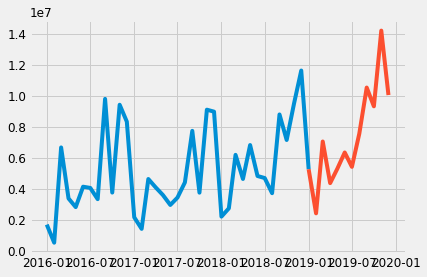

In [4]:

# sale_total = pd.read_excel("sales_11.xlsx")
sale_total = pd.read_excel("sales_replaced.xlsx")
sale_total.head()
cols = ['Row ID', 'Customer ID', 'Segment', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
sale_total.drop(cols, axis=1, inplace=True)
sale_total = sale_total.sort_values('Order Date')


sale_total.isnull().sum()
sale_total= sale_total.groupby('Order Date')['Sales'].sum().reset_index()
sale_total = sale_total.set_index('Order Date')

sale_total=sale_total['Sales'].resample('MS').sum()

sale_total= sale_total.to_frame()


print(type(sale_total))



train = sale_total[:'2019-01-01']
train.head()
test= sale_total['2019-01-01':]

# train = sale_total[:'2017-01-01']
# train.head()
# test= sale_total['2017-01-01':]
plt.plot(train)
plt.plot(test)
print(sale_total.index)
print(sale_total['Sales'])
# print(sale_total['Order Date'])


In [5]:
stepwise_model = auto_arima(sale_total, start_p=0,start_q=0,
                           max_p=2,max_d=2, max_q=2, m=12,
                           start_P=0,start_Q=0, seasonal=True,
                           d=0, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1134.544, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1131.309, Time=0.32 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1128.995, Time=0.39 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1142.802, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1136.687, Time=0.06 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=1130.770, Time=0.34 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=1129.775, Time=0.66 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1130.248, Time=0.51 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=1130.943, Time=0.89 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1128.145, Time=0.11 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=1129.504, Time=0.30 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=1128.477, Time=0.31 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1129.334, Time=0.13 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=1128.824, Time=0.59 sec
 ARIMA(1,0,0)(0,1,1

In [6]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -558.674
Date:                            Mon, 15 Feb 2021   AIC                           1127.347
Time:                                    13:17:08   BIC                           1135.265
Sample:                                         0   HQIC                          1130.111
                                             - 48                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.753e+05   8.69e+05      0.662      0.508   -1.13e+06    2.28e+06
ar.L1          0.5559      0.660      0.842      0.400      -0.738       1.850
ma.L1         -0.6541      0.577     -1.134      0.257      -1.784       0.476
ma.S.L12      -0.3769      0.169     -2.225      0.026      -0.709      -0.045
sigma2      2.304e+12      0.236   9.76e+12      0.000     2.3e+12     2.3e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 1.59
Prob(Q):                              0.60   Prob(JB):                         0.45
Heteroskedasticity (H):               3.62   Skew:                             0.50
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.09e+29. Standard errors may be unstable.
"""

In [7]:
stepwise_model.fit(train)

ARIMA(order=(1, 0, 1), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [8]:
future_forecast = stepwise_model.predict(n_periods=12)
# This returns an array of predictions:
print(future_forecast)

[ 4013287.45379746  7567291.27172404  6203844.41414916  7466896.93657076
  6179655.66608226  6214282.35132076  5763482.40507064 10349135.31178409
  7845749.88591638 11102168.57880039 12327021.30370904  6217724.77216227]


In [9]:
future_forecast = stepwise_model.predict(n_periods=12)
# This returns an array of predictions:
print(future_forecast)

[ 4013287.45379746  7567291.27172404  6203844.41414916  7466896.93657076
  6179655.66608226  6214282.35132076  5763482.40507064 10349135.31178409
  7845749.88591638 11102168.57880039 12327021.30370904  6217724.77216227]


In [10]:
len(test.index)
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns =
                               ["Prediction"])
pd.concat([test,future_forecast],axis=1).iplot()

In [11]:
pd.concat([sale_total,future_forecast],axis=1).iplot()

In [12]:


from openpyxl.workbook import Workbook
future_forecast2 = stepwise_model.predict(n_periods=30)
# This returns an array of predictions:
print(future_forecast2)
index = pd.date_range('2019-12-01', periods=30, freq='M')
future_forecast2 = pd.DataFrame(future_forecast2,index =index,columns =
                               ["Prediction"])
pd.concat([sale_total,future_forecast2],axis=1).iplot()

future_forecast2['Date']= index

# write DataFrame to excel 
datatoexcel = pd.ExcelWriter('future_replaced_forecast.xlsx') 

future_forecast2.to_excel(datatoexcel) 
  
# save the excel 
datatoexcel.save() 
print('DataFrame is written to Excel File successfully.')

future_forecast2.to_excel('future_replaced_forecast.xlsx', index=False)



[ 4013287.45379746  7567291.27172404  6203844.41414916  7466896.93657076
  6179655.66608226  6214282.35132076  5763482.40507064 10349135.31178409
  7845749.88591638 11102168.57880039 12327021.30370904  6217724.77216227
  5436538.17924954  8966852.95231968  7587611.32564565  8840132.62013437
  7545869.60965853  7575814.52058124  7121892.9818507  11705464.55380589
  9200691.38933901 12456184.80174518 13680420.5920502   7570712.71679275
  6789251.85875155 10319383.76440757  8940020.21012526 10192460.20887447
  8898142.99412649  8928051.76412551]


DataFrame is written to Excel File successfully.


Order Date
2016-01-01     582129.60
2016-02-01     128606.88
2016-03-01    1032705.48
2016-04-01    1338608.88
2016-05-01     856274.88
Freq: MS, Name: Sales, dtype: float64
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1088.769, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1083.074, Time=0.10 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1083.283, Time=0.07 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1093.079, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1090.550, Time=0.01 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1084.673, Time=0.23 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=1083.074, Time=0.10 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1081.088, Time=0.07 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=1082.102, Time=0.18 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=1083.199, Time=0.32 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1080.338, Time=0.06 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=108

[1039892.26710442 2242672.34340303 1629340.49854732 1700376.62137079
 1615620.02615571 1644846.39636185 1471621.65438553 2977335.80764824
 1955227.64633371 2795268.97869844 4021529.09113013 2244223.77134589
 1270955.5967121  2473735.67301071 1860403.82815499 1931439.95097846
 1846683.35576339 1875909.72596953 1702684.98399321 3208399.13725592
 2186290.97594138 3026332.30830611 4252592.42073781 2475287.10095356
 1502018.92631978 2704799.00261838 2091467.15776267 2162503.28058614
 2077746.68537106 2106973.05557721]


Order Date
2016-01-01     582129.60
2016-02-01     128606.88
2016-03-01    1032705.48
2016-04-01    1338608.88
2016-05-01     856274.88
2016-06-01    1554364.44
2016-07-01    1814546.96
2016-08-01    1365535.44
2016-09-01    3290795.76
2016-10-01     865335.36
2016-11-01    3223512.32
2016-12-01    2160775.44
2017-01-01     217053.60
2017-02-01     644168.04
2017-03-01    1905905.64
2017-04-01    1507026.96
2017-05-01    1093648.32
2017-06-01    1277729.64
2017-07-01     566412.68
2017-08-01    1408212.96
2017-09-01    2316692.04
2017-10-01    1040809.20
2017-11-01    2546175.60
2017-12-01    1944200.88
2018-01-01     635961.84
2018-02-01     815344.00
2018-03-01    2081631.72
2018-04-01    1277693.64
2018-05-01    1564224.24
2018-06-01    1308217.20
2018-07-01    1550933.28
2018-08-01    1075168.80
2018-09-01    2791648.56
2018-10-01    1953815.28
2018-11-01    2458475.36
2018-12-01    4559707.92
2019-01-01    2552914.68
2019-02-01     888932.64
2019-03-01    1746034.32
2019-04-01    

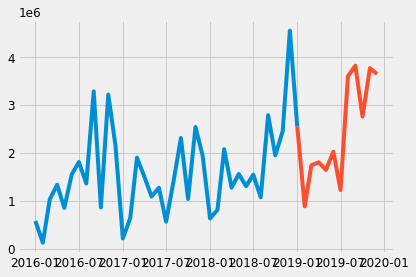

In [24]:
# def sales(sale_category):
#     x= sale_category

# sale_category = df.loc[df['Category'] == sale_category]
sale_category = df.loc[df["Category"] == "{}".format("Office Supplies")]
cols = ['Row ID', 'Customer ID', 'Segment', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
sale_category.drop(cols, axis=1, inplace=True)
sale_category = sale_category.sort_values('Order Date')

sale_category.isnull().sum()
sale_category= sale_category.groupby('Order Date')['Sales'].sum().reset_index()
sale_category = sale_category.set_index('Order Date')
sale_category=sale_category['Sales'].resample('MS').sum()
print(sale_category.head())

sale_category.head(100)
train = sale_category[:'2019-01-01']
train.head()
test= sale_category['2019-01-01':]

# train = sale_total[:'2017-01-01']
# train.head()
# test= sale_total['2017-01-01':]
plt.plot(train)
plt.plot(test)


stepwise_model = auto_arima(sale_category, start_p=0,start_q=0,
   max_p=2,max_d=2, max_q=2, m=12,
   start_P=0,start_Q=0, seasonal=True,
   d=0, D=1, trace=True,
   error_action='ignore',  
   suppress_warnings=True, 
   stepwise=True)
print(stepwise_model.aic())
print(stepwise_model.summary())

stepwise_model.fit(train)
future_forecast = stepwise_model.predict(n_periods=12)
print(len(test.index))
# This returns an array of predictions:
print(future_forecast)
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns =
       ["Prediction"])
pd.concat([test,future_forecast],axis=1).iplot()
pd.concat([sale_category,future_forecast],axis=1).iplot()
future_forecast2 = stepwise_model.predict(n_periods=30)
#     This returns an array of predictions:
print(future_forecast2)
index = pd.date_range('2019-12-01', periods=30, freq='M')
future_forecast2 = pd.DataFrame(future_forecast2,index =index,columns =
       ["Prediction"])
pd.concat([sale_category,future_forecast2],axis=1).iplot()
print(sale_category)

#     if(x== "Furniture"):
#         furniture_pred=future_forecast2
#         return furniture_pred
#     elif(x=="Technology"):
#         tech_pred=future_forecast2
#         return tech_pred
#     else:
#         office_pred=future_forecast2
#         return office_pred


        

  
 
     

In [25]:
future_forecast2['Date']= index

# write DataFrame to excel 
datatoexcel = pd.ExcelWriter('Office_replaced_forecast.xlsx') 

future_forecast2.to_excel(datatoexcel) 
  
# save the excel 
datatoexcel.save() 
print('DataFrame is written to Excel File successfully.')

future_forecast2.to_excel('Office_replaced_forecast.xlsx', index=False)




DataFrame is written to Excel File successfully.


In [ ]:
sales("Furniture")



In [ ]:
sales("Technology")

In [ ]:
sales("Office Supplies")

In [ ]:
office_pred.info()